EXP NO: 02 DATE: Execute data preprocessing step on the above dataset: perform outlier and missing data analysis towards building a refined dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

print(train_data.head())
print(test_data.head())

#Step 1: Dataset Information
print(train_data.info())
print(train_data.describe())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
#Step 2: Outlier Exploration
z_scores = np.abs(stats.zscore(train_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = train_data[~outliers]

print(f"Original dataset shape: {train_data.shape}")
print(f"Dataset shape after outlier removal: {data_no_outliers.shape}")

Original dataset shape: (2000, 21)
Dataset shape after outlier removal: (1988, 21)


/tmp/ipython-input-983757531.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


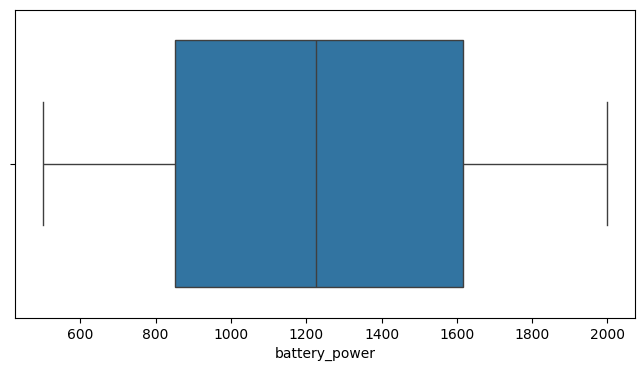

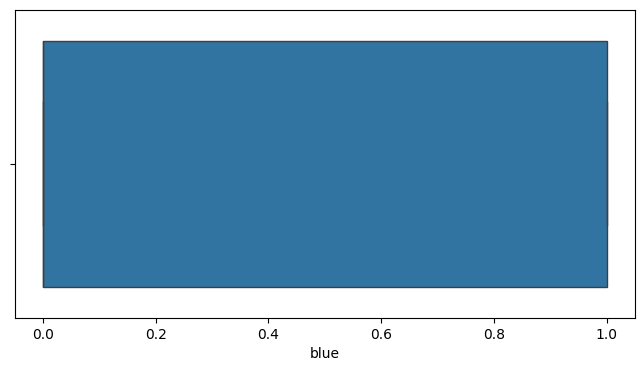

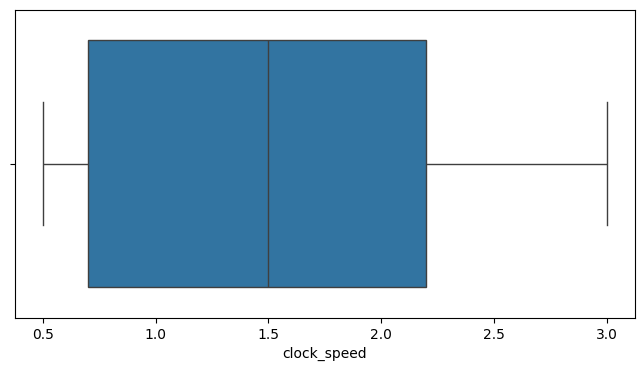

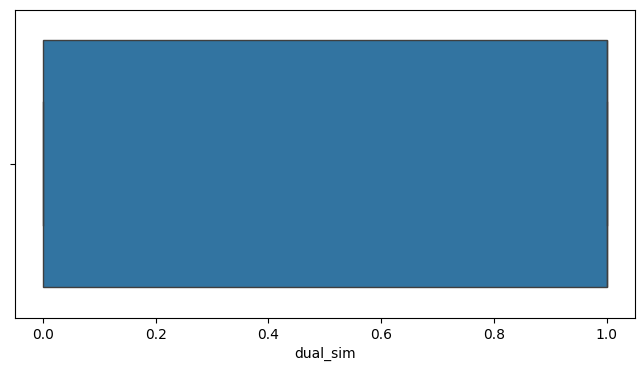

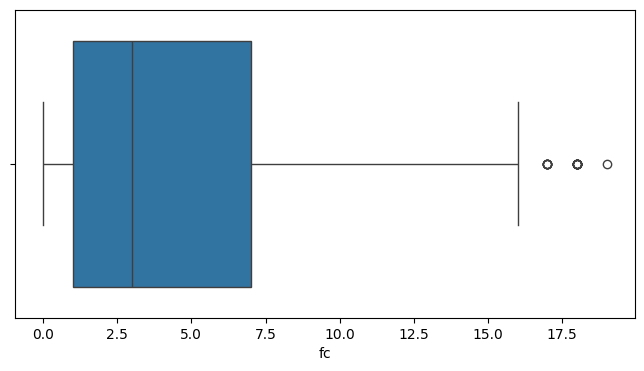

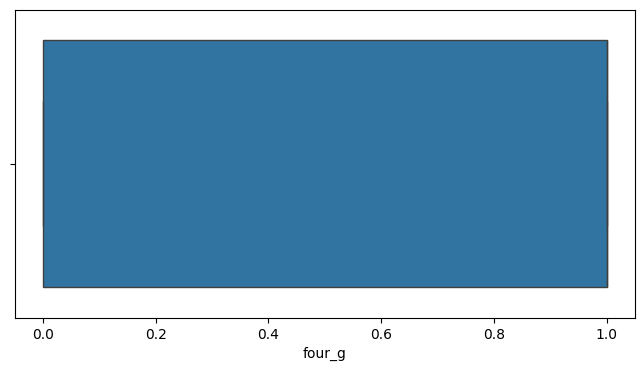

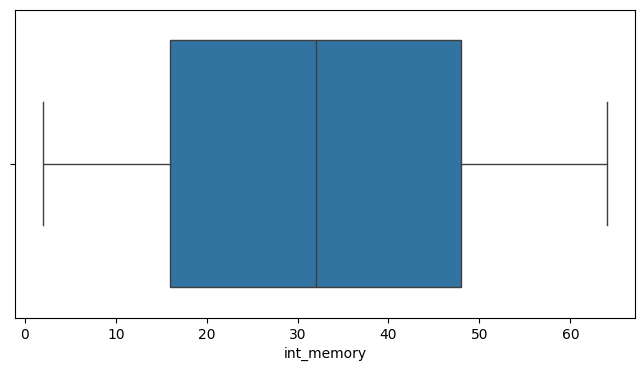

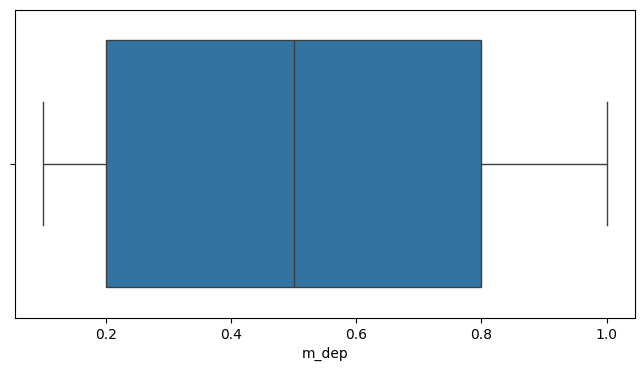

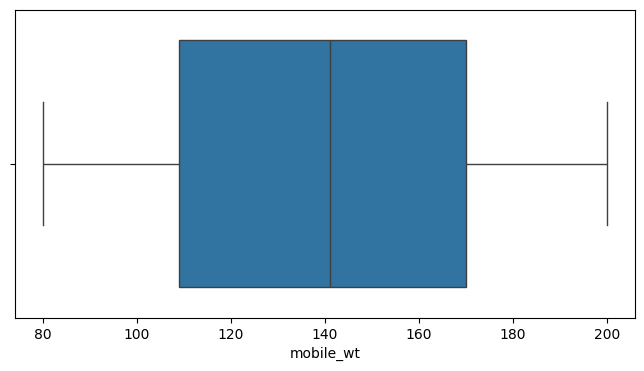

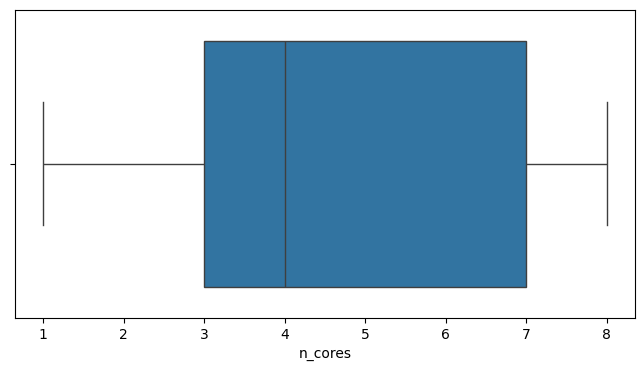

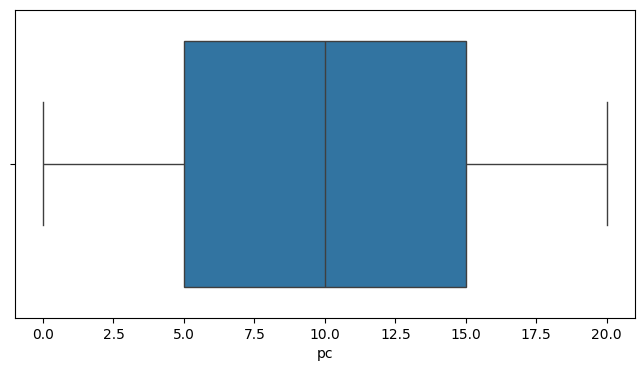

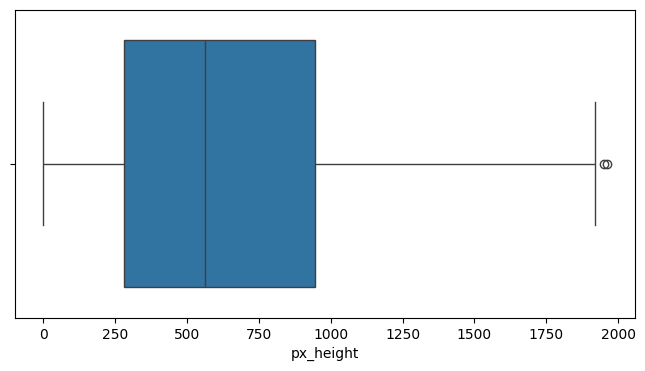

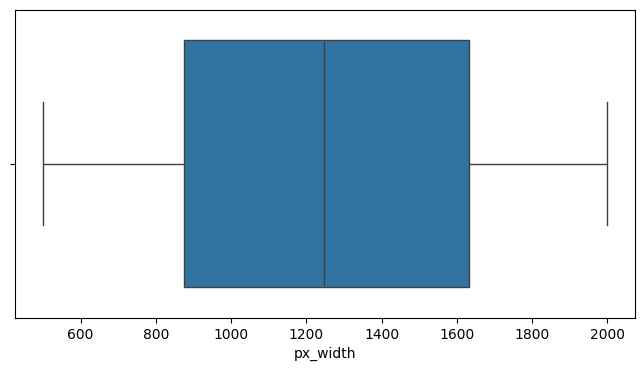

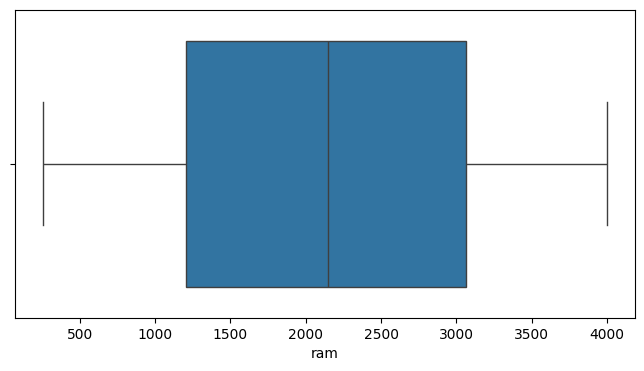

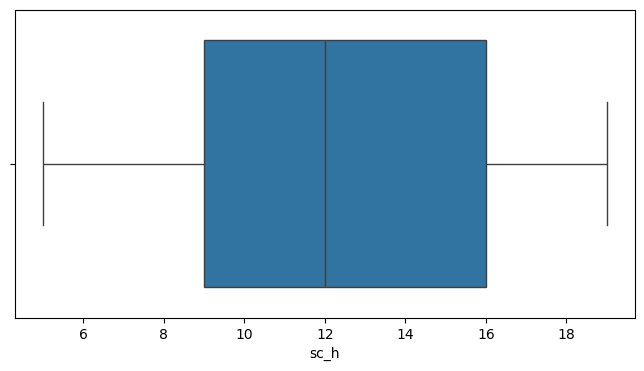

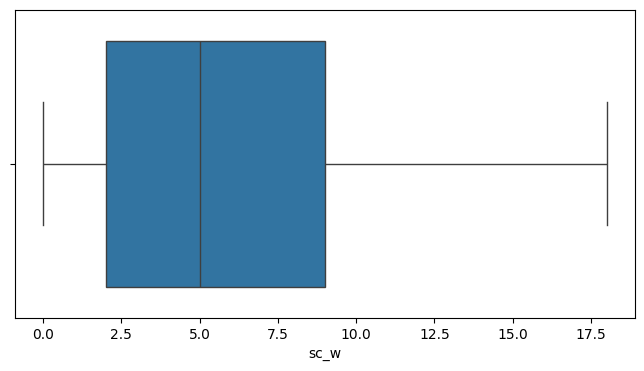

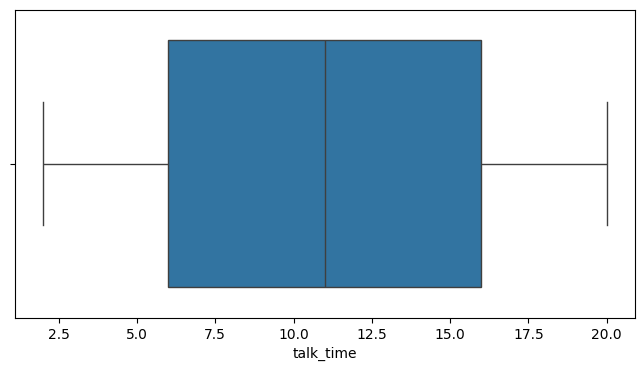

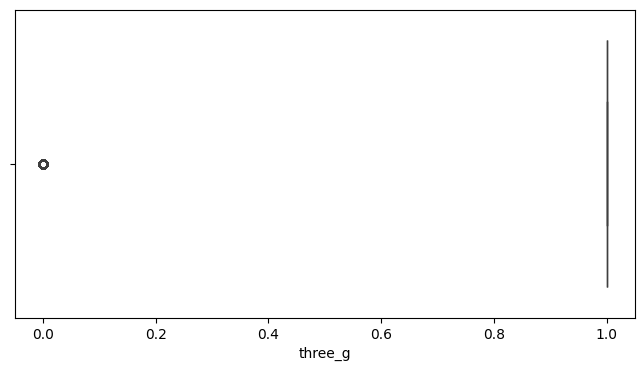

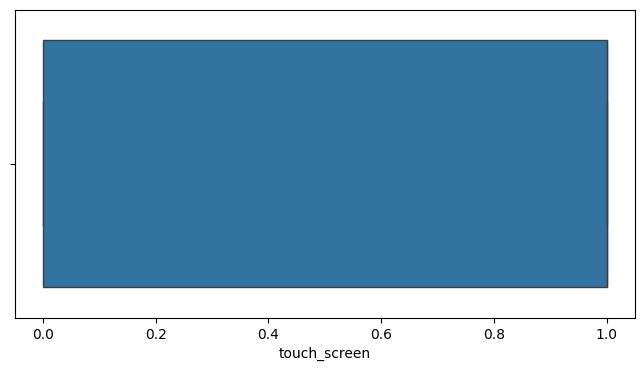

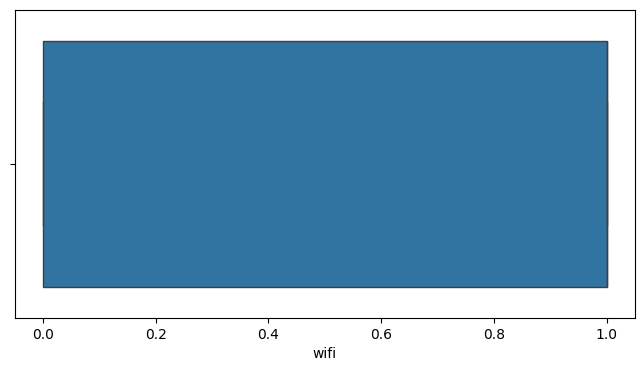

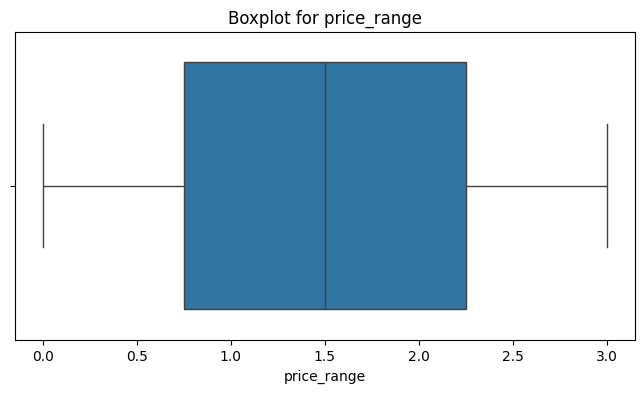

In [ ]:
#Visualizing outliers
numeric_features = train_data.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
 plt.figure(figsize=(8, 4))
 sns.boxplot(x=train_data[feature])
plt.title(f'Boxplot for {feature}')
plt.show()

In [ ]:
#Step 3: Missing Data Analysis
missing_values = train_data.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

Missing values before imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
#Imputation
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
#Separating numeric and categorical features
numeric_features = train_data.select_dtypes(include=[np.number]).columns
categorical_features = train_data.select_dtypes(include=[object]).columns

In [ ]:
#Impute numeric columns
for col in numeric_features:
 train_data[col] = num_imputer.fit_transform(train_data[[col]])

In [ ]:
#Impute categorical columns
for col in categorical_features:
 train_data[col] = cat_imputer.fit_transform(train_data[[col]]).ravel()
print("Missing values after imputation:")
print(train_data.isnull().sum())

Missing values after imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
#Step 4: Feature Engineering
#Creating new features based on domain knowledge
train_data['Price_Per_Ram'] = train_data['price_range'] / train_data['ram']

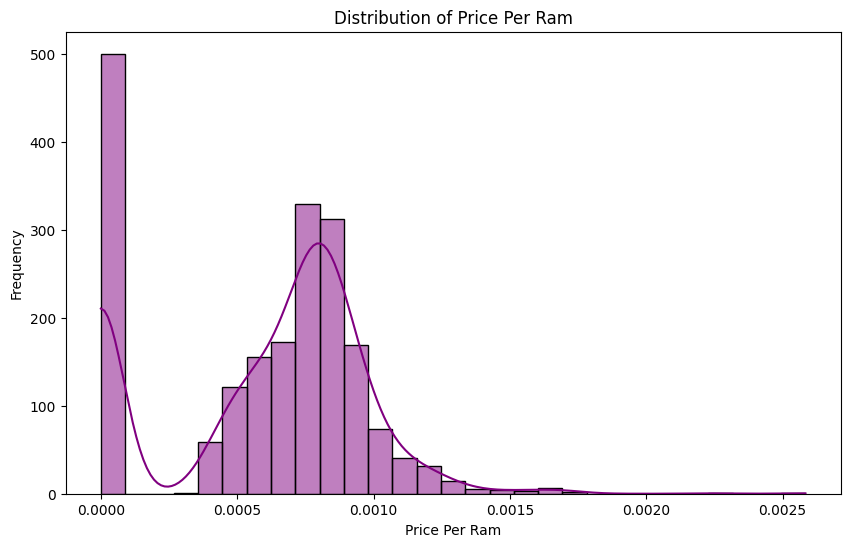

In [ ]:
#Visualize the new feature
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Price_Per_Ram'], kde=True, color='purple')
plt.title("Distribution of Price Per Ram")
plt.xlabel("Price Per Ram")
plt.ylabel("Frequency")
plt.show()

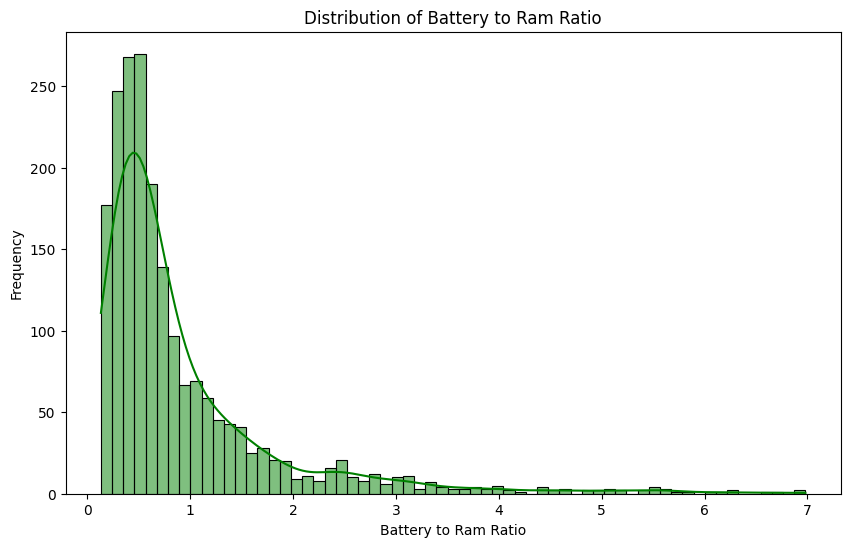

In [ ]:
#Additional Feature Engineering
train_data['Battery_to_Ram_Ratio'] = train_data['battery_power'] / train_data['ram']
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Battery_to_Ram_Ratio'], kde=True, color='green')
plt.title("Distribution of Battery to Ram Ratio")
plt.xlabel("Battery to Ram Ratio")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Step 5: Feature Scaling and Encoding
X = pd.get_dummies(train_data.drop('price_range', axis=1), drop_first=True)
y = train_data['price_range']

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 6: Model Training
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [ ]:
#Step 7: Model Evaluation
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Gradient Boosting R-squared: {gb_r2:.4f}")
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Gradient Boosting Mean Squared Error: {gb_mse:.4f}")

Random Forest R-squared: 0.9999
Gradient Boosting R-squared: 0.9998
Random Forest Mean Squared Error: 0.0001
Gradient Boosting Mean Squared Error: 0.0003


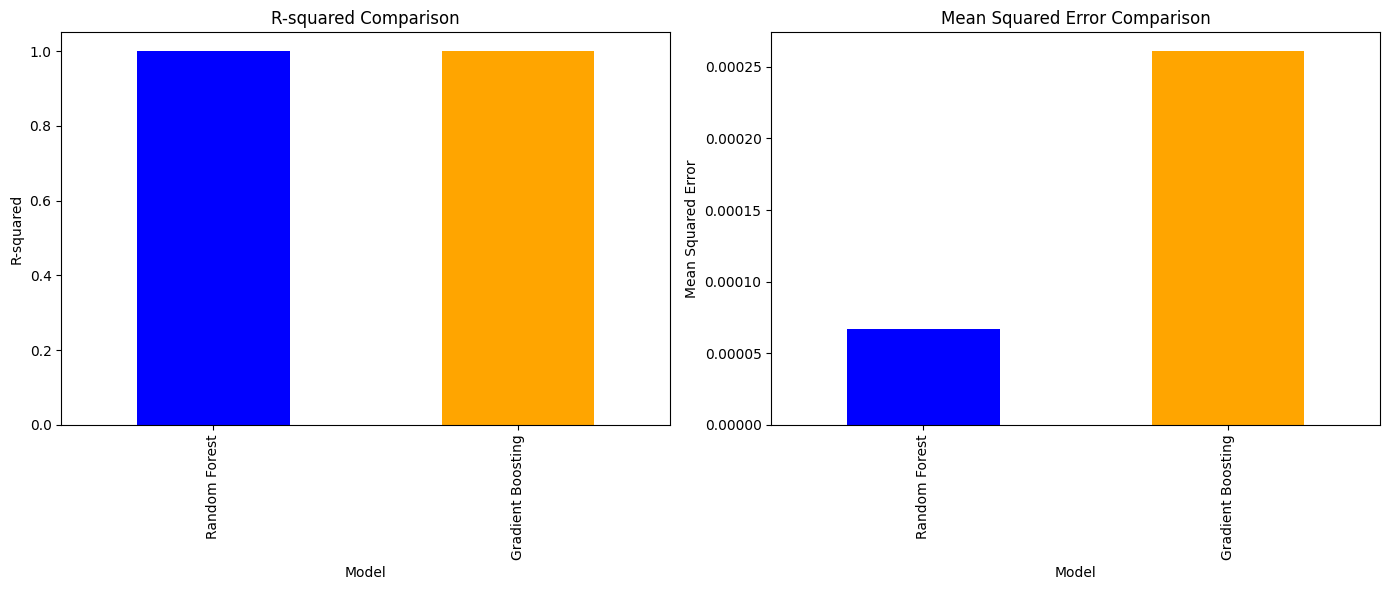

Random Forest is the better model.


In [ ]:
#Step 7: Model Evaluation
metrics = pd.DataFrame({

'Model': ['Random Forest', 'Gradient Boosting'],
'R-squared': [rf_r2, gb_r2],
'Mean Squared Error': [rf_mse, gb_mse]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
metrics.set_index('Model')['R-squared'].plot(kind='bar', color=['blue', 'orange'], ax=axes[0])
axes[0].set_title("R-squared Comparison")
axes[0].set_ylabel("R-squared")

metrics.set_index('Model')['Mean Squared Error'].plot(kind='bar', color=['blue', 'orange'],
ax=axes[1])
axes[1].set_title("Mean Squared Error Comparison")
axes[1].set_ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()

if rf_r2 > gb_r2:
    print("Random Forest is the better model.")
else:
    print("Gradient Boosting is the better model.")

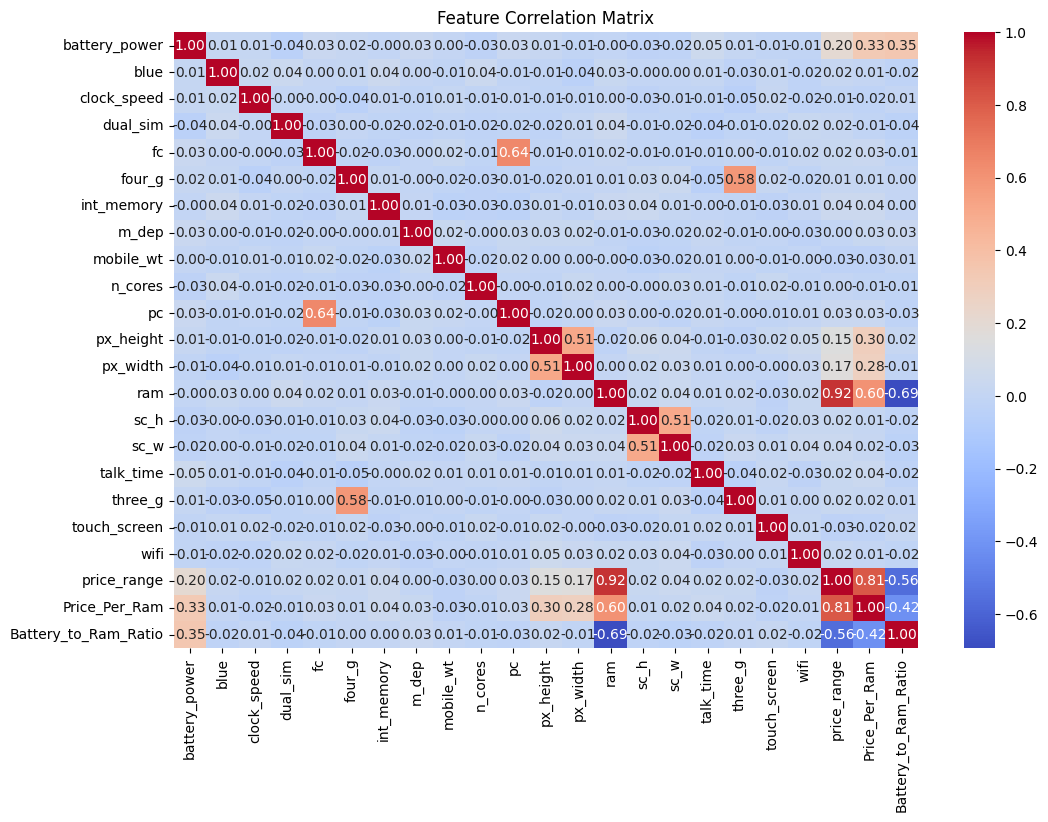

In [ ]:
#Additional Insights
#Visualizing Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()